In [1]:
import pandas as pd

In [2]:
wines = pd.read_csv("data/winequality-red.csv")

In [3]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
nans = wines.isnull().sum()
types = wines.dtypes

stats = pd.DataFrame({"NaN values": nans,"Type": types})
stats

,NaN values,Type
fixed acidity,0,float64
volatile acidity,0,float64
citric acid,0,float64
residual sugar,0,float64
chlorides,0,float64
free sulfur dioxide,0,float64
total sulfur dioxide,0,float64
density,0,float64
pH,0,float64
sulphates,0,float64


In [5]:
wines[['quality']].value_counts()

quality
5          681
6          638
7          199
4           53
8           18
3           10
dtype: int64

# Visualisation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

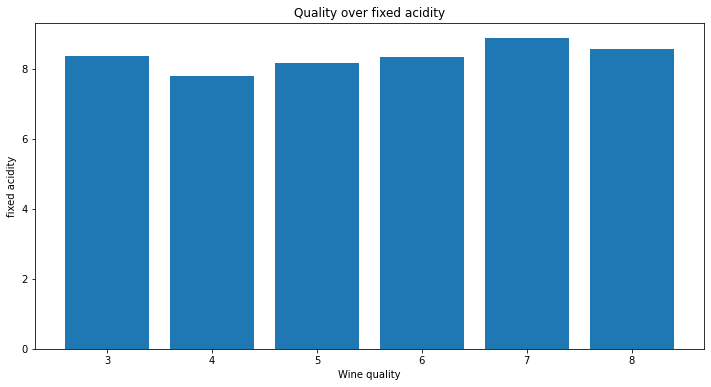

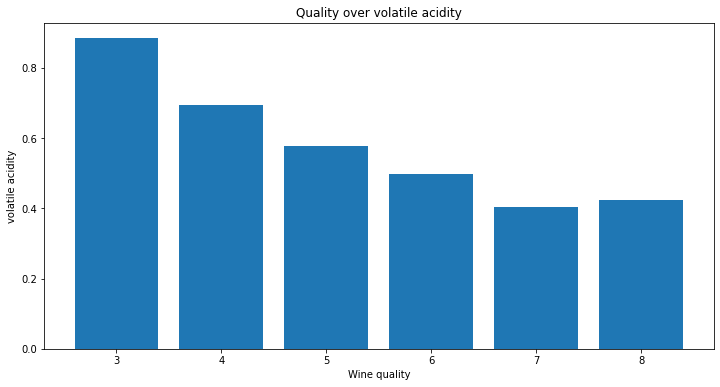

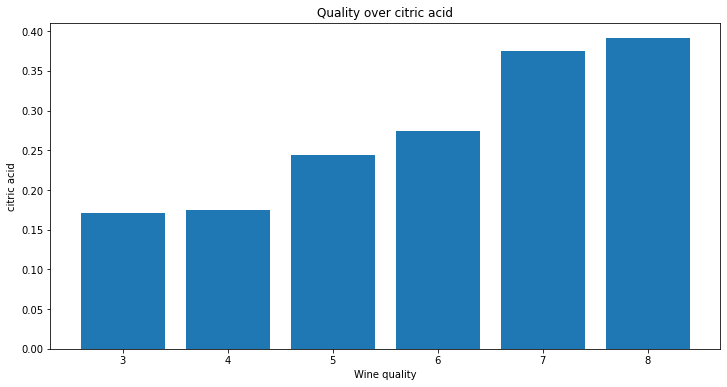

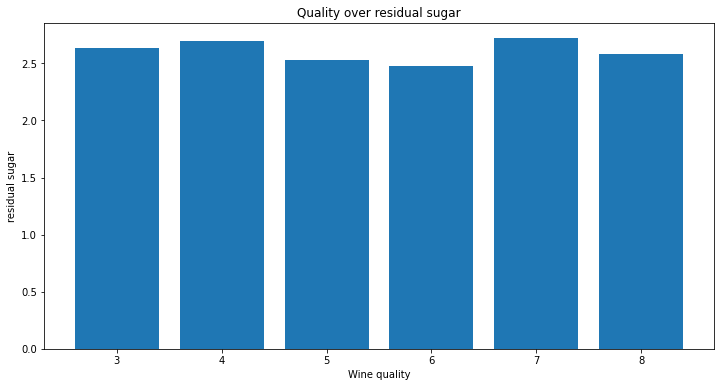

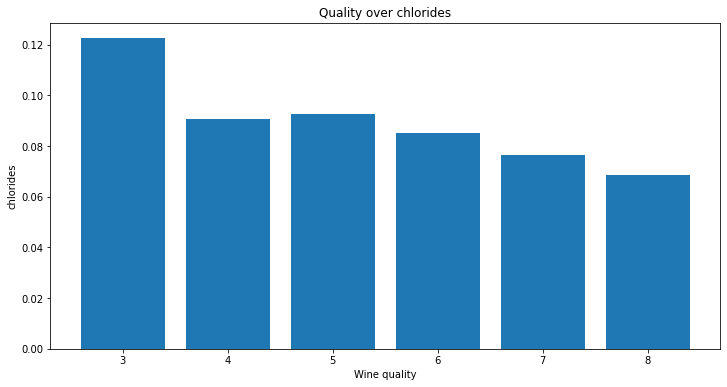

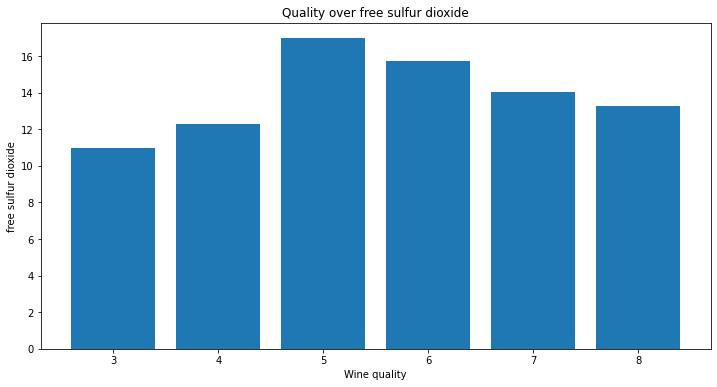

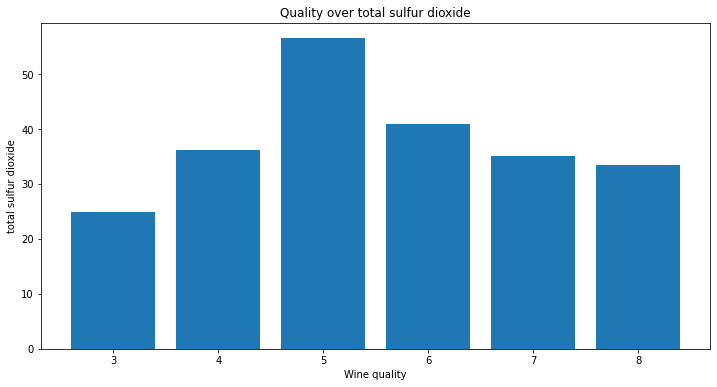

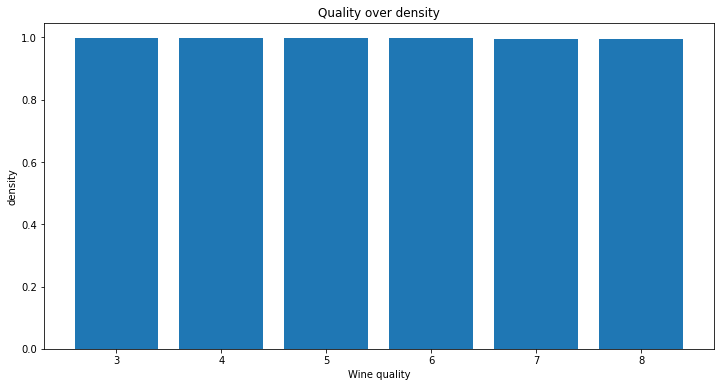

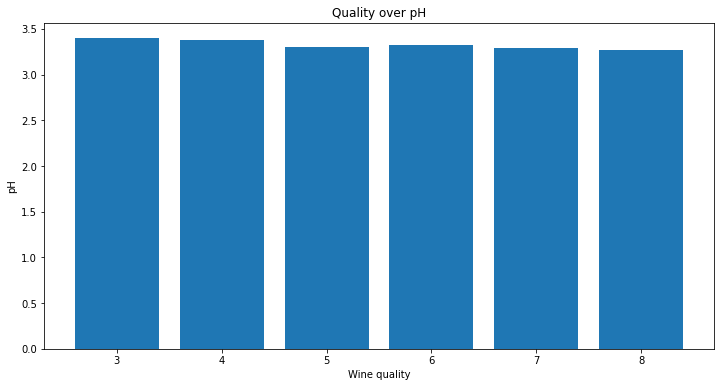

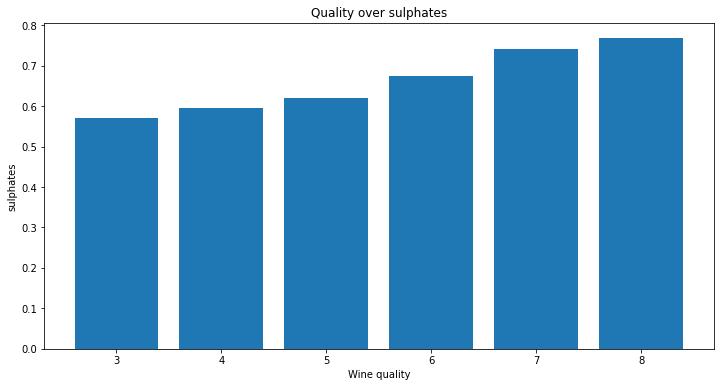

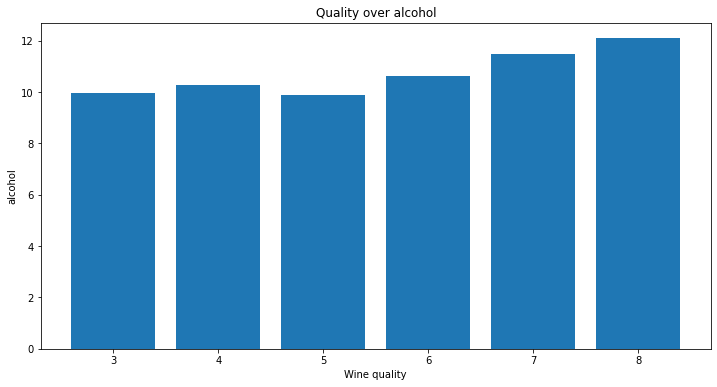

In [7]:
for col in wines.iloc[:, :-1].columns:
    x = wines.groupby('quality').mean()
    
    fig = plt.figure(figsize = (12, 6))
    plt.bar(x.index, x[col])
    
    plt.title(f"Quality over {col}")
    plt.xlabel("Wine quality")
    plt.ylabel(col)
    
    plt.savefig(f"plots/{col}.svg")
    plt.show()

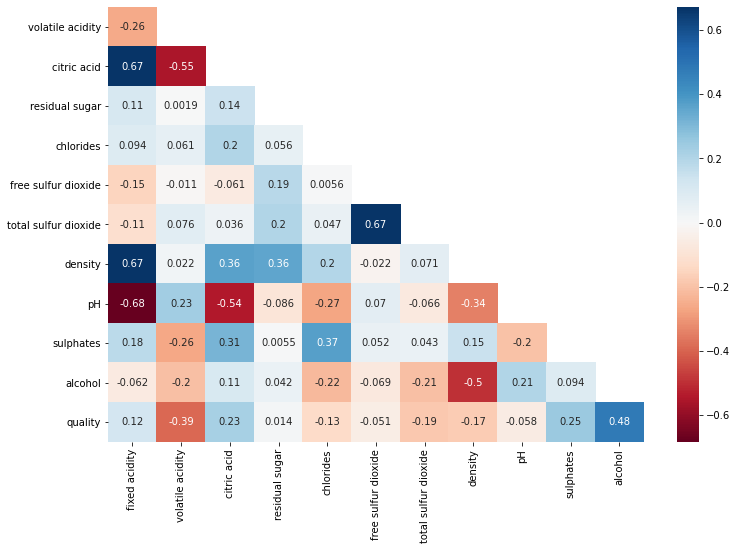

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

corr = wines.corr().iloc[1:, :-1]

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(corr, annot=True, ax=ax, cmap="RdBu", center=0, mask=mask)
plt.xticks(rotation=25)

plt.savefig("plots/correlations.svg")
plt.show()

## Feature engineering

In [9]:
X = wines.iloc[:, :-1]
y = wines['quality']

X = X.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis=1)

# Linear Regression

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
y_hat = lin_reg.predict(X_test)
y_hat_train = lin_reg.predict(X_train)

print("- R^2 (train, test): ", r2_score(y_train, y_hat_train), r2_score(y_test, y_hat))
print("- MAE (train, test): ", mean_absolute_error(y_train, y_hat_train), mean_absolute_error(y_test, y_hat))

- R^2 (train, test):  0.3573834159052385 0.3414623987067906
- MAE (train, test):  0.5084145671886361 0.4967362023981516


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_hat = log_reg.predict(X_test)
y_hat_train = log_reg.predict(X_train)

In [16]:
print("Train score:", log_reg.score(X_train, y_train))
print("Test score:", log_reg.score(X_test, y_test))

Train score: 0.603836530442035
Test score: 0.57


In [17]:
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[  0   1   0   1   0   0]
 [  0   1   9   4   0   0]
 [  2   0 126  52   1   0]
 [  0   0  50  91  10   0]
 [  0   0   2  38  10   0]
 [  0   0   0   1   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.07      0.12        14
           5       0.67      0.70      0.68       181
           6       0.49      0.60      0.54       151
           7       0.45      0.20      0.28        50
           8       0.00      0.00      0.00         2

    accuracy                           0.57       400
   macro avg       0.35      0.26      0.27       400
weighted avg       0.56      0.57      0.55       400



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Split into Bad - Average - Good

In [18]:
y_bag = pd.cut(y, 3, labels=[0, 1, 2])

In [19]:
y_bag.value_counts()

1    1319
2     217
0      63
Name: quality, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bag, random_state=4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_hat = log_reg.predict(X_test)
y_hat_train = log_reg.predict(X_train)

In [21]:
print("Train score:", log_reg.score(X_train, y_train))
print("Test score:", log_reg.score(X_test, y_test))

Train score: 0.8423686405337781
Test score: 0.8275


In [22]:
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[  1  15   0]
 [  2 317  13]
 [  0  39  13]]
              precision    recall  f1-score   support

           0       0.33      0.06      0.11        16
           1       0.85      0.95      0.90       332
           2       0.50      0.25      0.33        52

    accuracy                           0.83       400
   macro avg       0.56      0.42      0.45       400
weighted avg       0.79      0.83      0.80       400



# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [24]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=4)
dtc.fit(X_train, y_train)

y_hat = dtc.predict(X_test)

In [25]:
print("Train score:", dtc.score(X_train, y_train))
print("Test score:", dtc.score(X_test, y_test))

Train score: 0.8565471226021685
Test score: 0.8425


In [26]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.33      0.06      0.11        16
           1       0.87      0.96      0.91       332
           2       0.60      0.35      0.44        52

    accuracy                           0.84       400
   macro avg       0.60      0.46      0.48       400
weighted avg       0.81      0.84      0.82       400



In [27]:
pd.DataFrame(dtc.feature_importances_ * 100, X.columns, columns=['importance (%)'])

,importance (%)
fixed acidity,3.767196
volatile acidity,13.094599
citric acid,0.000000
chlorides,0.000000
total sulfur dioxide,8.245689
density,0.000000
sulphates,22.145089
alcohol,52.747427


# Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=5, activation='relu', max_iter=1000, random_state=4)
mlp.fit(X_train, y_train.values.ravel())

y_hat = mlp.predict(X_test)

In [30]:
print("Train score:", mlp.score(X_train, y_train))
print("Test score:", mlp.score(X_test, y_test))

Train score: 0.8398665554628857
Test score: 0.8275


In [31]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.85      0.96      0.90       332
           2       0.48      0.23      0.31        52

    accuracy                           0.83       400
   macro avg       0.44      0.40      0.40       400
weighted avg       0.77      0.83      0.79       400



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
